In [1]:
from dataset import Dataset
from runner import Runner
from model_lgbm import ModelLGBM
import matplotlib.pyplot as plt
import lightgbm as lgb
import pandas as pd

In [21]:
prms = {
  'num_round': 10000,
  'early_stopping_rounds': 10,
  'task': 'train',
  'boosting_type': 'gbdt',
  'objective': 'regression',
  'metrics': 'huber',
  'num_leaves': 30,
  'learning_rate': 0.3,
  'verbosity': -1,
  'verbose_eval': -1,
  'verbose_early': 0,
}
features = [
    'target','最高気温', '平均気温', '最低気温', '平均湿度',
    '平均現地気圧', '平均蒸気圧', '平均雲量', '平均風速', '日照時間']
train_years = [
    #[2008, 2009],
    [2010, 2011],
    [2012, 2013],
    [2014, 2015],
    [2016, 2017],
    ]
test_years = [2018, 2019]

In [3]:
feature_names = features.copy()
for i, name_a in enumerate(feature_names):
    if name_a == 'target':
        continue
    for j, name_b in enumerate(feature_names):
        if i >= j:
            continue
        name = name_a + '_x_' + name_b
        features.append(name)

In [22]:
def get_all_multipy_names(multipy_num, feature_names):
    def multipy(target_num, require_least_num, names):
        if target_num == multipy_num:
            name = names[0]
            for i in range(1, multipy_num):
                name += '_x_' + names[i]
            return name
        for i in range(require_least_num, len(feature_names)):
            if feature_names[i] == 'target':
                continue
            result = multipy(target_num + 1, i + 1, names + [feature_names[i]])
            if result is not None:
                all_feature_names.append(result)
    all_feature_names = []
    multipy(0, 0, [])
    return all_feature_names
names = get_all_multipy_names(3, features)
print(names)
features += names

['最高気温_x_平均気温_x_最低気温', '最高気温_x_平均気温_x_平均湿度', '最高気温_x_平均気温_x_平均現地気圧', '最高気温_x_平均気温_x_平均蒸気圧', '最高気温_x_平均気温_x_平均雲量', '最高気温_x_平均気温_x_平均風速', '最高気温_x_平均気温_x_日照時間', '最高気温_x_最低気温_x_平均湿度', '最高気温_x_最低気温_x_平均現地気圧', '最高気温_x_最低気温_x_平均蒸気圧', '最高気温_x_最低気温_x_平均雲量', '最高気温_x_最低気温_x_平均風速', '最高気温_x_最低気温_x_日照時間', '最高気温_x_平均湿度_x_平均現地気圧', '最高気温_x_平均湿度_x_平均蒸気圧', '最高気温_x_平均湿度_x_平均雲量', '最高気温_x_平均湿度_x_平均風速', '最高気温_x_平均湿度_x_日照時間', '最高気温_x_平均現地気圧_x_平均蒸気圧', '最高気温_x_平均現地気圧_x_平均雲量', '最高気温_x_平均現地気圧_x_平均風速', '最高気温_x_平均現地気圧_x_日照時間', '最高気温_x_平均蒸気圧_x_平均雲量', '最高気温_x_平均蒸気圧_x_平均風速', '最高気温_x_平均蒸気圧_x_日照時間', '最高気温_x_平均雲量_x_平均風速', '最高気温_x_平均雲量_x_日照時間', '最高気温_x_平均風速_x_日照時間', '平均気温_x_最低気温_x_平均湿度', '平均気温_x_最低気温_x_平均現地気圧', '平均気温_x_最低気温_x_平均蒸気圧', '平均気温_x_最低気温_x_平均雲量', '平均気温_x_最低気温_x_平均風速', '平均気温_x_最低気温_x_日照時間', '平均気温_x_平均湿度_x_平均現地気圧', '平均気温_x_平均湿度_x_平均蒸気圧', '平均気温_x_平均湿度_x_平均雲量', '平均気温_x_平均湿度_x_平均風速', '平均気温_x_平均湿度_x_日照時間', '平均気温_x_平均現地気圧_x_平均蒸気圧', '平均気温_x_平均現地気圧_x_平均雲量', '平均気温_x_平均現地気圧_x_平均風速', '平均気温_x_平均現地気圧_x_日照時間', '平均気温_x_平均蒸気圧_x_平

[2019-11-24 22:08:51] - test - start training cv
[2019-11-24 22:08:51] - test fold 0 - start training
[2019-11-24 22:08:51] - test fold 0 - end training - score 14.122181740890285
[2019-11-24 22:08:51] - test fold 1 - start training
[2019-11-24 22:08:52] - test fold 1 - end training - score 15.495274429488186
[2019-11-24 22:08:52] - test fold 2 - start training
[2019-11-24 22:08:52] - test fold 2 - end training - score 10.694435617617657
[2019-11-24 22:08:52] - test fold 3 - start training
[2019-11-24 22:08:52] - test fold 3 - end training - score 7.811138627299732
[2019-11-24 22:08:52] - test - end training cv
name:test
	score:12.030757603823966
	score0:14.122181740890285
	score1:15.495274429488186
	score2:10.694435617617657
	score3:7.811138627299732
[2019-11-24 22:08:52] - test - start predicting cv
[2019-11-24 22:08:52] - test - start prediction fold:0
[2019-11-24 22:08:52] - test - end prediction fold:0 - score 22.760695931089337
[2019-11-24 22:08:52] - test - start prediction fold

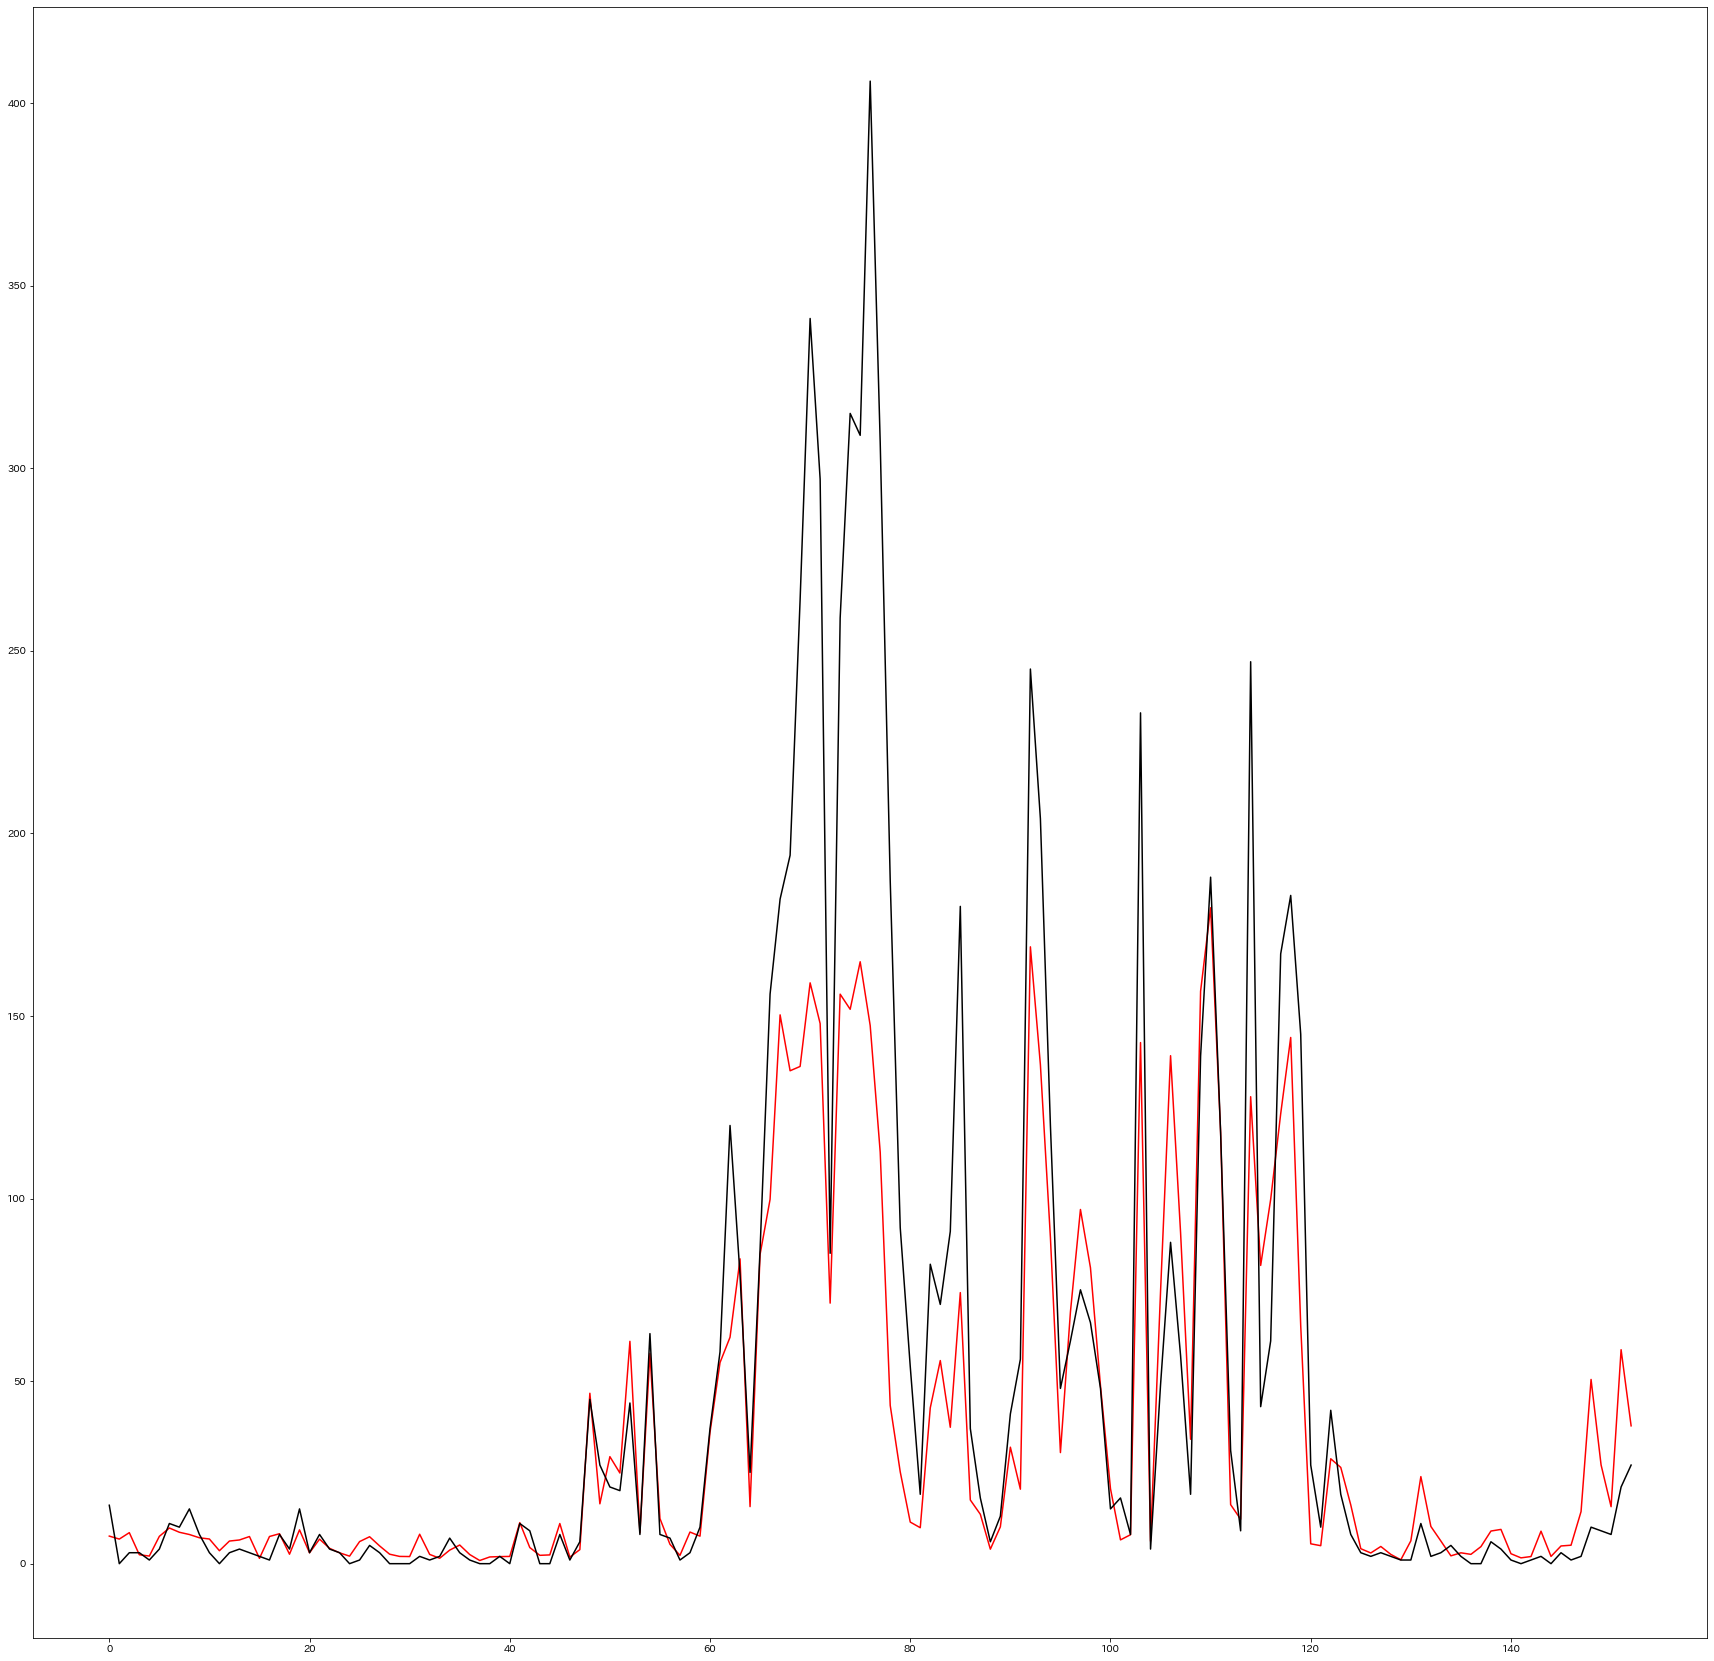

In [24]:
dataset = Dataset(features)
#dataset.add_past_day_data([i for i in range(1, 4)])

runner = Runner('test', ModelLGBM, dataset, train_years, test_years, prms)

runner.run_train_cv()
runner.run_predict_cv()

%matplotlib inline
pred, correct,_ = runner.get_predict_cv()
plt.figure(figsize=(30, 30))
plt.plot(pred, color='r')

plt.plot(correct.values, color='black')
plt.show()

<Figure size 1440x1440 with 0 Axes>

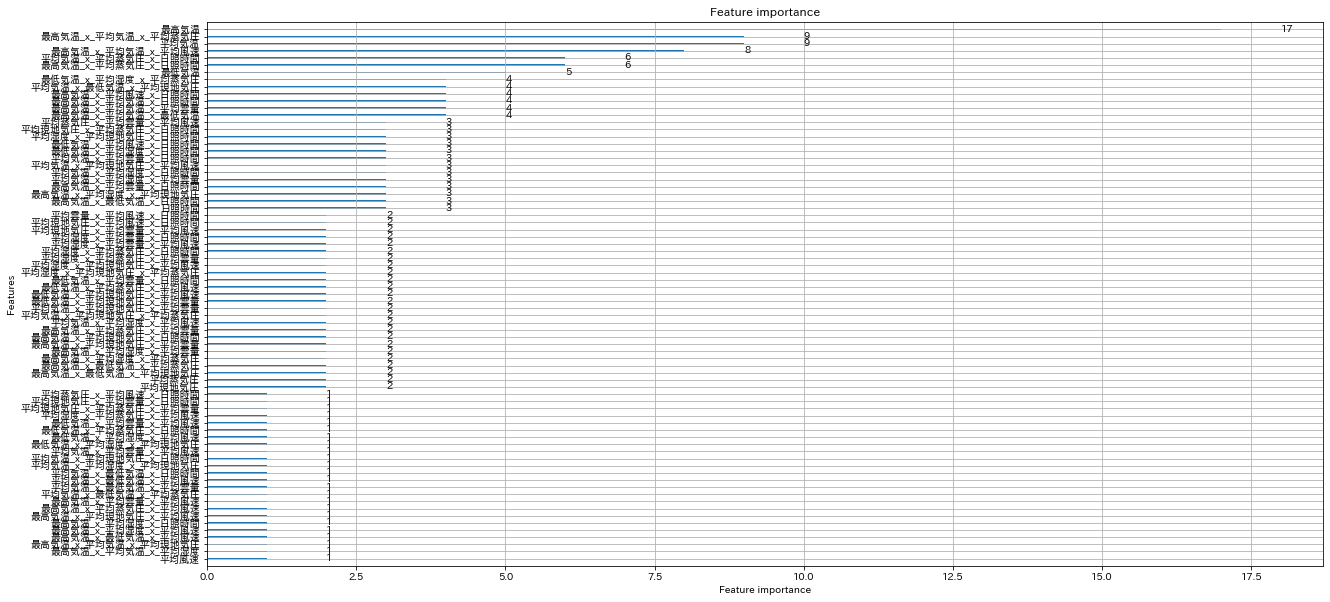

In [26]:
# 特徴量の重要度をプロットする
model = ModelLGBM('test-3', features)
model.load_model()
plt.figure(figsize=(20, 20))
lgb.plot_importance(model.model, figsize=(20, 10))
plt.savefig('data.png')